## Grant Applications

In [68]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier

import wordcloud as wc

from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,recall_score, precision_score,confusion_matrix,accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

In [4]:
df=pd.read_csv('data/training.csv')
x_names = pd.read_csv('data/reducedSet.csv')
df_test=pd.read_csv('data/testing.csv')

In [5]:
X_df = df[x_names.values[:,0]]
Y_df = df['Class'].replace({'successful':1,'unsuccessful':0})
X_df_test = df_test[x_names.values[:,0]]
Y_df_test = df_test['Class'].replace({'successful':1,'unsuccessful':0})

In [6]:
X_traning=X_df.values
X_test=X_df_test.values

Y_traning = Y_df.values
Y_test = Y_df_test.values

In [61]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 10%%, %d%%)" % random.randint(60, 100)

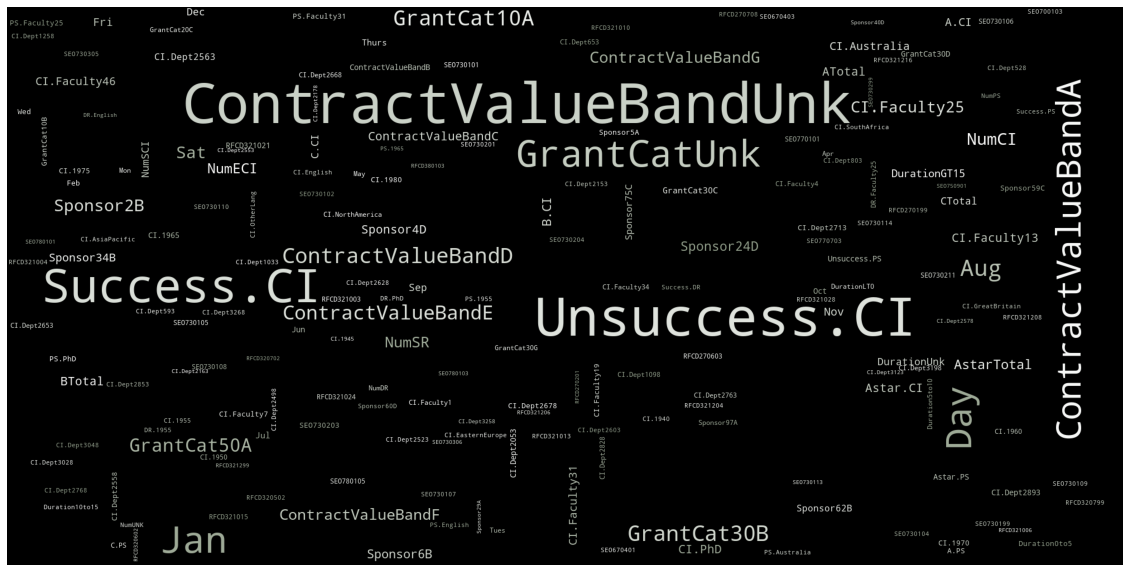

In [90]:
wc_countries = wc.WordCloud(max_font_size=100,color_func=grey_color_func,background_color="black",height=1000,width=2000,normalize_plurals=False).generate_from_frequencies(rf_df.to_dict()[0])
plt.figure(figsize=(20,20))
plt.imshow(wc_countries)
plt.axis("off")
plt.savefig('wordcloud_data_1.pdf',bbox_inches='tight')
plt.show()

In [11]:
max_index = X_df.columns[[39,40, 223]]

In [7]:
def Column_suc_unsuc(columns,column_name):
    aux = []
    value = df[columns].values
    for i in range(0,8190):
        ind=np.where(value[i,:]==1)
        if len(ind[0])!=0:
            aux.append(columns[ind[0][0]])
        if len(ind[0])==0:
            aux.append('NaN')
    df[column_name] = aux
    df_sucs=df.loc[df['Class']=='successful'].groupby(column_name).size()
    df_unsu=df.loc[df['Class']=='unsuccessful'].groupby(column_name).size()

    new_df = pd.concat([df_sucs,df_unsu], axis=1)
    new_df.rename(columns={0:'Successful',1:'Unsuccessful'},inplace=True)
    new_df[column_name]=new_df.index
    tidy = new_df.melt(id_vars=column_name).rename(columns=str.title)
    tidy.rename(columns={'Variable':'Application Result'},inplace=True)

    

    return tidy

In [102]:
tidy = Column_suc_unsuc(["Sponsor149A",
"Sponsor24D",
"Sponsor29A",
"Sponsor2B",
"Sponsor32D",
"Sponsor34B",
"Sponsor40D",
"Sponsor4D",
"Sponsor59C",
"Sponsor5A",
"Sponsor60D",
"Sponsor62B",
"Sponsor6B",
"Sponsor75C",
"Sponsor97A"],'Sponsors')

In [103]:
without_na_1 = tidy.loc[tidy['Application Result']=='Successful'][['Sponsors','Value']].dropna()
without_na_2 = tidy.loc[tidy['Application Result']=='Unsuccessful'][['Sponsors','Value']].dropna()

In [104]:
inv_map_1 = {v: k for k, v in without_na_1.to_dict()['Sponsors'].items()}
inv_map_2 = {v: k for k, v in without_na_2.to_dict()['Sponsors'].items()}

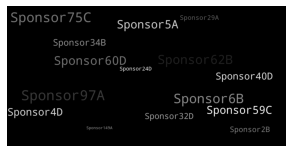

In [108]:
wc_countries = wc.WordCloud(max_font_size=100,colormap='Greys',background_color="black",
                            height=1000,width=2000,
                            normalize_plurals=False).generate_from_frequencies(inv_map_1)
plt.figure(figsize=(5,5))
plt.imshow(wc_countries)
plt.axis("off")
plt.savefig('wordcloud_data_2.pdf',bbox_inches='tight')
plt.show()

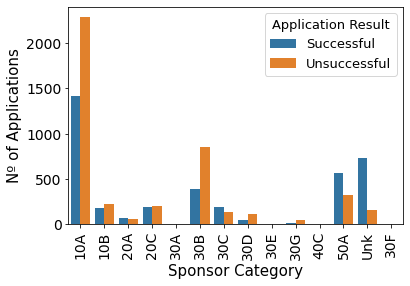

In [68]:
tidy=Column_suc_unsuc(["GrantCat10A","GrantCat10B","GrantCat20A","GrantCat20C","GrantCat30A","GrantCat30B","GrantCat30C","GrantCat30D","GrantCat30E","GrantCat30F","GrantCat30G","GrantCat40C","GrantCat50A","GrantCatUnk"],'Grancatvalue')
ax=sns.barplot(x='Grancatvalue', 
y='Value', hue='Application Result', 
data=tidy)
plt.xticks(rotation=90)
ax.set_xticklabels(["10A","10B",'20A','20C','30A','30B','30C','30D','30E','30G','40C','50A','Unk','30F'])
ax.legend(loc='upper right',fontsize=13,title='Application Result',title_fontsize=13)
plt.xlabel('Sponsor Category',size=15)
plt.ylabel('Nº of Applications',size=15)
plt.savefig('SponsorCategory.pdf',bbox_inches='tight')
plt.show()

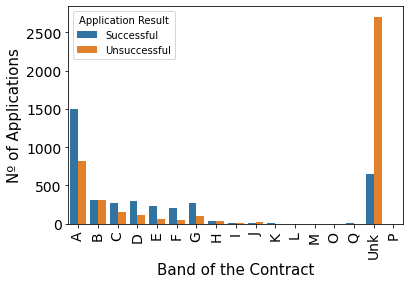

In [123]:
df_contract,figure=Column_suc_unsuc(["ContractValueBandA","ContractValueBandB","ContractValueBandC","ContractValueBandD","ContractValueBandE","ContractValueBandF","ContractValueBandG","ContractValueBandH","ContractValueBandI","ContractValueBandJ","ContractValueBandK","ContractValueBandL","ContractValueBandM","ContractValueBandO","ContractValueBandP","ContractValueBandQ","ContractValueBandUnk"],'Contractband')
plt.xticks(rotation=90)
figure.set_xticklabels(["A","B","C","D","E","F","G","H","I","J","K","L","M","O","Q","Unk","P"],rotation=90)
plt.xlabel('Band of the Contract',size=15)
plt.ylabel('Nº of Applications',size=15)
plt.savefig('ContracBand.pdf',bbox_inches='tight')
plt.show()

In [ ]:
df_contract,figure=Column_suc_unsuc(["ContractValueBandA","ContractValueBandB","ContractValueBandC","ContractValueBandD","ContractValueBandE","ContractValueBandF","ContractValueBandG","ContractValueBandH","ContractValueBandI","ContractValueBandJ","ContractValueBandK","ContractValueBandL","ContractValueBandM","ContractValueBandO","ContractValueBandP","ContractValueBandQ","ContractValueBandUnk"],'Contractband')
plt.xticks(rotation=90)
figure.set_xticklabels(["A","B","C","D","E","F","G","H","I","J","K","L","M","O","Q","Unk","P"],rotation=90)
plt.xlabel('Band of the Contract',size=15)
plt.ylabel('Nº of Applications',size=15)
plt.savefig('ContracBand.pdf',bbox_inches='tight')
plt.show()

In [47]:
aux = []
value = df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']].values
columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,8190):
    ind=np.where(value[i,:]==1)
    aux.append(columns[ind[0][0]])

df['Month'] = aux

In [14]:
aux = []
value = df[['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']].values
columns = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
for i in range(0,8190):
    ind=np.where(value[i,:]==1)
    aux.append(columns[ind[0][0]])

In [15]:
df['Week_day']=aux

In [16]:
df_sucs_1=df.loc[df['Class']=='successful'].groupby('Month').size()
df_sucs_2=df.loc[df['Class']=='successful'].groupby('Day').size()
df_sucs_3=df.loc[df['Class']=='successful'].groupby('Week_day').size()

In [78]:
df=pd.concat([X_df,Y_df],axis=1)

In [79]:
df_sucs_4=df.loc[df['Class']==1].groupby('Unsuccess.CI').size()
df_unsu_4=df.loc[df['Class']==0].groupby('Unsuccess.CI').size()

new_df = pd.concat([df_sucs_4, df_unsu_4], axis=1)
new_df.rename(columns={0:'Successful',1:'Unsuccessful'},inplace=True)

In [80]:
new_df=new_df.fillna(0)

In [81]:
new_df['n_success']=new_df.index

In [82]:
#tidy_day = day_df.melt(id_vars='Day').rename(columns=str.title)
#tidy_wd = week_day_df.melt(id_vars='Week_Day').rename(columns=str.title)
tidy = new_df.melt(id_vars='n_success').rename(columns=str.title)

In [17]:
df_unsu_1=df.loc[df['Class']=='unsuccessful'].groupby('Month').size()
df_unsu_2=df.loc[df['Class']=='unsuccessful'].groupby('Day').size()
df_unsu_3=df.loc[df['Class']=='unsuccessful'].groupby('Week_day').size()

In [19]:
month_df = pd.concat([df_sucs_1, df_unsu_1], axis=1)
month_df.rename(columns={0:'Successful',1:'Unsuccessful'},inplace=True)

day_df = pd.concat([df_sucs_2, df_unsu_2], axis=1)
day_df.rename(columns={0:'Successful',1:'Unsuccessful'},inplace=True)

week_day_df = pd.concat([df_sucs_3, df_unsu_3], axis=1)
week_day_df.rename(columns={0:'Successful',1:'Unsuccessful'},inplace=True)

In [20]:
month_df['Month']=month_df.index
day_df['Day']=day_df.index
week_day_df['Week_Day']=week_day_df.index

In [22]:
months = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
tidy_wd['Week_Day'] = pd.Categorical(tidy_wd['Week_Day'], categories=months, ordered=True)
tidy_wd.sort_values(by='Week_Day')

Week_Day      Variable  Value
1       Mon    Successful    749
8       Mon  Unsuccessful    803
5      Tues    Successful    597
12     Tues  Unsuccessful    658
6       Wed    Successful    588
13      Wed  Unsuccessful    752
4     Thurs    Successful    416
11    Thurs  Unsuccessful    358
0       Fri    Successful    606
7       Fri  Unsuccessful    952
2       Sat    Successful    619
9       Sat  Unsuccessful    861
3       Sun    Successful    228
10      Sun  Unsuccessful      3

In [123]:
tidy_month = month_df.melt(id_vars='Month').rename(columns=str.title)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
tidy_month['Month'] = pd.Categorical(tidy_month['Month'], categories=months, ordered=True)

Month      Variable  Value months
4    Jan    Successful    480    Jan
16   Jan  Unsuccessful     45    Jan
3    Feb    Successful    158    Feb
15   Feb  Unsuccessful    142    Feb
7    Mar    Successful    114    Mar
19   Mar  Unsuccessful     88    Mar
0    Apr    Successful    102    Apr
12   Apr  Unsuccessful    112    Apr
20   May  Unsuccessful    200    May
8    May    Successful    253    May
6    Jun    Successful    190    Jun
18   Jun  Unsuccessful    191    Jun
5    Jul    Successful    364    Jul
17   Jul  Unsuccessful    225    Jul
1    Aug    Successful    364    Aug
13   Aug  Unsuccessful   1013    Aug
11   Sep    Successful    486    Sep
23   Sep  Unsuccessful    738    Sep
22   Oct  Unsuccessful    453    Oct
10   Oct    Successful    310    Oct
9    Nov    Successful    794    Nov
21   Nov  Unsuccessful   1075    Nov
2    Dec    Successful    188    Dec
14   Dec  Unsuccessful    105    Dec

In [84]:
tidy.rename(columns={'Variable':'Application Result'},inplace=True)

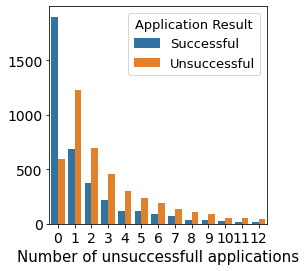

In [90]:
ax=sns.barplot(x='N_Success', y='Value', hue='Application Result', data=tidy.loc[tidy['N_Success']<=12])
plt.xlabel('Number of unsuccessfull applications',size=15)
plt.ylabel('',size=15)
ax.legend(loc='upper right',fontsize=13,title='Application Result',title_fontsize=13)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
plt.savefig('Previous_unsuccessful_applications.pdf',bbox_inches='tight')

In [ ]:
ax=sns.barplot(x='N_Success', y='Value', hue='Application Result', data=tidy.loc[tidy['N_Success']<=12])
plt.xlabel('Number of successfull applications',size=15)
plt.ylabel('Nº of Applications',size=15)
ax.legend(loc='upper right',fontsize=13,title='Application Result',title_fontsize=13)
plt.savefig('Previous_successful_applications.pdf',bbox_inches='tight')

In [24]:
sns.barplot(x='Month', y='Value', hue='Application Result', data=tidy_month)
plt.xlabel('Month',size=15)
plt.ylabel('Nº of Applications',size=15)
plt.savefig('Month_Sucessful.pdf',bbox_inches='tight')

NameError: name 'tidy' is not defined

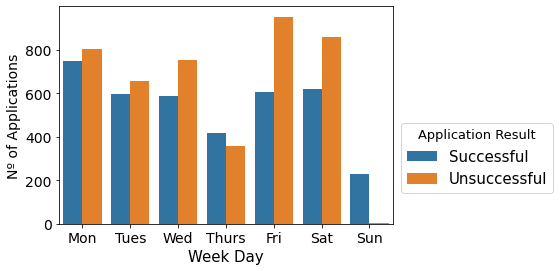

In [34]:
sns.barplot(x='Week_Day', y='Value', hue='Application Result', data=tidy_wd)
plt.xlabel('Week Day',size=15)
plt.ylabel('Nº of Applications',size=14)
plt.legend(bbox_to_anchor=(1,0.5),fontsize=15,title='Application Result',title_fontsize=13)
plt.savefig('Week_Sucessful.pdf',bbox_inches='tight')

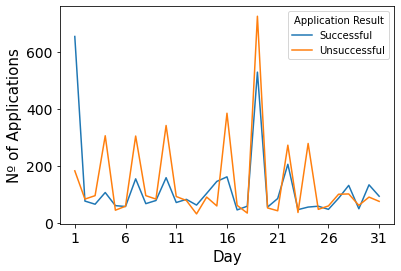

In [161]:
sns.lineplot(x='Day', y='Value', hue='Application Result', data=tidy)
#plt.stem(tidy['Day'],tidy['Value'],)
plt.xticks(np.arange(1,36,5))
plt.xlabel('Day',size=15)
plt.ylabel('Nº of Applications',size=15)
plt.savefig('Day_Sucessful.pdf',bbox_inches='tight')

# Feature Selection: Using  Random Forest

In [8]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=5)

In [9]:
rf.fit(X_traning,Y_traning)

NameError: name 'X_traning' is not defined

In [74]:
FI=rf.feature_importances_
index=FI.argsort()
rf_df = pd.DataFrame(np.sort(FI),index=X_df.columns[index],columns=['Feature Importance'])

In [75]:
rf_df.tail(10)

Feature Importance
GrantCat30B                     0.018081
GrantCat10A                     0.023199
Aug                             0.028049
Day                             0.049943
Jan                             0.052216
ContractValueBandA              0.055016
GrantCatUnk                     0.065927
Success.CI                      0.091341
Unsuccess.CI                    0.150774
ContractValueBandUnk            0.183978

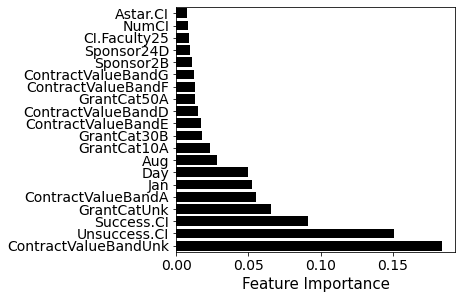

In [77]:
plt.figure(figsize=(5,4.5))
sns.barplot(y=rf_df.tail(20).index,x=rf_df.tail(20)['Feature Importance'].values,color='k',orient='h')
plt.xlabel('Feature Importance',size=15)
plt.savefig('Feature_Importance.pdf',bbox_inches='tight')
plt.show()

In [8]:
X_traning=X_df[['Jan', 'GrantCatUnk', 'Success.CI', 'Unsuccess.CI',
       'ContractValueBandUnk','Day','ContractValueBandA']].values
X_test=X_df_test[['Jan', 'GrantCatUnk', 'Success.CI', 'Unsuccess.CI',
       'ContractValueBandUnk','Day','ContractValueBandA']].values

Y_traning = Y_df.values
Y_test = Y_df_test.values

## Logistic Regression

In [101]:
logistic_regression=LogisticRegression(penalty='none')
logistic_regression_l1=LogisticRegression(penalty='l1',solver='saga',tol=1e-6, max_iter=int(1e6),C=1)
logistic_regression_l2=LogisticRegression(penalty='l2',tol=1e-6, max_iter=int(1e6),C=1)

In [102]:
logistic_regression_l1.fit(X_traning,Y_traning)
logistic_regression_l1.score(X_test,Y_test)

0.8301158301158301

In [103]:
grid={"C":np.arange(1,10,1), "penalty":["l1"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='saga',tol=1e-6, max_iter=int(1e3))
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_traning,Y_traning)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

KeyboardInterrupt: 

In [104]:
logistic_regression.fit(X_traning,Y_traning)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
logistic_regression.score(X_test,Y_test)

0.8301158301158301

In [ ]:
logistic_regression_l1.fit(X_traning,Y_traning)
logistic_regression.fit(X_traning,Y_traning)
logistic_regression_l2.fit(X_traning,Y_traning)

In [ ]:
y_predict_l1=logistic_regression_l1.predict(X_test)
y_predict_l2=logistic_regression_l2.predict(X_test)

In [17]:
y_predict=logistic_regression.predict(X_test)

In [ ]:
confusion_matrix_l1 = confusion_matrix(Y_test,y_predict_l1)
confusion_matrix_l2 = confusion_matrix(Y_test,y_predict_l2)

In [18]:
confusion_matrix_lr = confusion_matrix(Y_test,y_predict)

In [19]:
confusion_matrix_lr

array([[265,  64],
       [ 24, 165]])

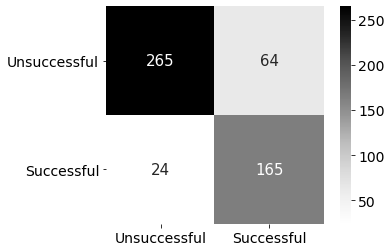

In [37]:
sns.heatmap(confusion_matrix_lr,annot=True,cmap='Greys',
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['Unsuccessful','Successful'],
            annot_kws={"fontsize":15},fmt='g')

plt.yticks(rotation=0)
plt.savefig('LR_confusion_matrix.pdf',bbox_inches='tight')

## LDA and QDA

In [54]:
lda=LDA().fit(X=X_traning,y=Y_traning)
qda=QDA().fit(X=X_traning,y=Y_traning)

In [55]:
lda_y_predict = lda.predict(X_test)
qda_y_predict = qda.predict(X_test)

confusion_matrix_lda = confusion_matrix(Y_test,lda_y_predict,labels=[0,1])
confusion_matrix_qda = confusion_matrix(Y_test,qda_y_predict,labels=[0,1])

In [56]:
confusion_matrix_lda

array([[259,  70],
       [ 14, 175]])

In [57]:
confusion_matrix_qda

array([[306,  23],
       [ 96,  93]])

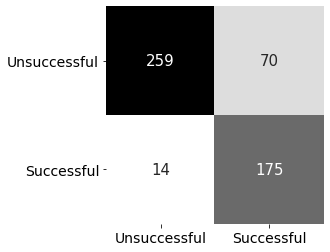

In [61]:
sns.heatmap(confusion_matrix_lda,annot=True,cmap='Greys',
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['Unsuccessful','Successful'],
            annot_kws={"fontsize":15},fmt='g',cbar=False)

plt.yticks(rotation=0)
plt.savefig('LDA_confusion_matrix.pdf',bbox_inches='tight')

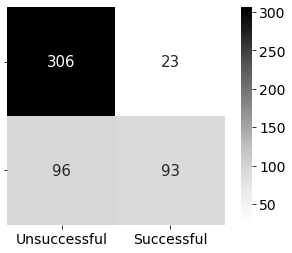

In [63]:
sns.heatmap(confusion_matrix_qda,annot=True,cmap='Greys',
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['',''],
            annot_kws={"fontsize":15},fmt='g')

plt.yticks(rotation=0)
plt.savefig('QDA_confusion_matrix.pdf',bbox_inches='tight')

In [66]:
lda.score(X_traning,Y_traning)

0.7862026862026862

In [101]:
lda_fpr, lda_tpr, _ = roc_curve(Y_test, lda_y_predict)
qda_fpr, qda_tpr, _ = roc_curve(Y_test, qda_y_predict)

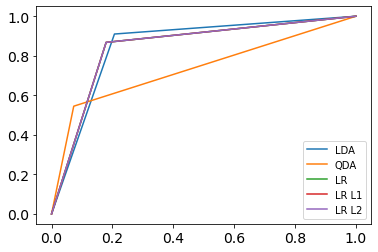

In [102]:
sns.lineplot(x=lda_fpr,y=lda_tpr,label='LDA')
sns.lineplot(x=qda_fpr,y=qda_tpr,label='QDA')

sns.lineplot(x=lr_fpr,y=lr_tpr,label='LR')
sns.lineplot(x=l1_fpr,y=l1_tpr,label='LR L1')
sns.lineplot(x=l2_fpr,y=l2_tpr,label='LR L2')
plt.legend()

## KNN: Class

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
score_list= []
for i in range(1,31):
    model_k = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    score =cross_val_score(model_k,X_traning,Y_traning,cv=10).mean()
    score_list.append(score)

KeyboardInterrupt: 

In [117]:
score_list_manhatthan= []
for i in range(1,31):
    model_k = KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    score =cross_val_score(model_k,X_traning,Y_traning,cv=10).mean()
    score_list_manhatthan.append(score)

In [118]:
score_list_chebyshev= []
for i in range(1,31):
    model_k = KNeighborsClassifier(n_neighbors=i,metric='chebyshev')
    score =cross_val_score(model_k,X_traning,Y_traning,cv=10).mean()
    score_list_chebyshev.append(score)

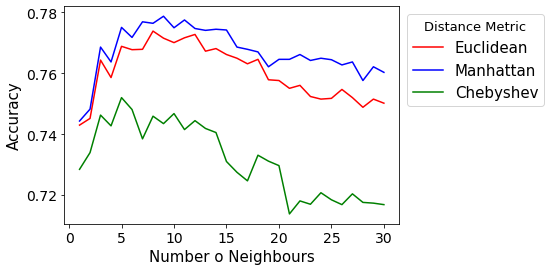

In [125]:
sns.lineplot(x=np.arange(1,31,1),y=score_list,color='r',label='Euclidean')
sns.lineplot(x=np.arange(1,31,1),y=score_list_manhatthan,color='b',label='Manhattan')
sns.lineplot(x=np.arange(1,31,1),y=score_list_chebyshev,color='g',label='Chebyshev')
plt.legend(bbox_to_anchor=(1,1),fontsize=15,title='Distance Metric',title_fontsize=13)
plt.xlabel('Number o Neighbours',size=15)
plt.ylabel('Accuracy',size=15)
plt.savefig('K_fold_KMeans.pdf',bbox_inches='tight')
plt.show()

In [43]:
value = np.max(score_list_manhatthan)
score_list_manhatthan.index(value)

NameError: name 'score_list_manhatthan' is not defined

In [45]:
k_model=KNeighborsClassifier(n_neighbors=8,metric='euclidean')
k_model.fit(X_traning,Y_traning)
score_euclidean=k_model.score(X_test,Y_test)

k_model=KNeighborsClassifier(n_neighbors=9,metric='manhattan')
k_model.fit(X_traning,Y_traning)
k_model.score(X_test,Y_test)

0.7934362934362934

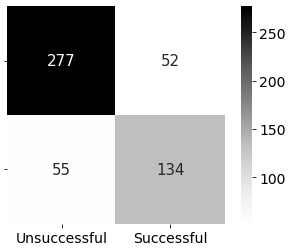

In [49]:
k_model=KNeighborsClassifier(n_neighbors=9,metric='manhattan')
k_model.fit(X_traning,Y_traning)

y_predict=k_model.predict(X_test)

CM=confusion_matrix(Y_test,y_predict)


sns.heatmap(CM,annot=True,cmap='Greys',
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['',''],
            annot_kws={"fontsize":15},fmt='g')

plt.yticks(rotation=0)
plt.savefig('KNN_confusion_matrix.pdf',bbox_inches='tight')

# SVM 

In [33]:
svm_class=SVC(kernel='rbf',C=100)
svm_class.fit(X_traning,Y_traning)
svm_class.score(X_test,Y_test)

0.8416988416988417

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X_traning,Y_traning,test_size=0.7, random_state=42)

In [42]:
values=[i for i in np.arange(0.1,1.1,0.1)]

In [18]:
score_list_rbf = []
values = [ 10**i for i in range(0,5)]
for i in values:
    print(i)
    svm_class=SVC(kernel='rbf',C=i)
    score =cross_val_score(svm_class,x_train,y_train,cv=5).mean()
    score_list_rbf.append(score)

1
10
100
1000
10000


In [19]:
score_list_rbf

[0.8001630983723279,
 0.8205147947609822,
 0.8433038597188418,
 0.8400534830195554,
 0.8367948272150747]

In [27]:
score_list = []
for i in np.arange(0,5):
    print(i)
    svm_class=SVC(kernel='rbf',C=10**i)
    score =cross_val_score(svm_class,x_train,y_train,cv=5).mean()
    score_list.append(score)

0
1
2
3
4


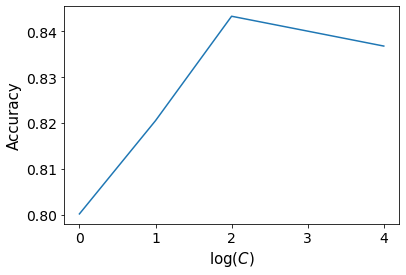

In [32]:
ax=sns.lineplot(x=[0,1,2,3,4],y=score_list)
plt.xlabel('$\log(C)$',size=15)
plt.ylabel('Accuracy',size=15)
plt.savefig('SVM_RBF.pdf',bbox_inches='tight')

In [10]:
sns.lineplot(x=values,y=score_list,label='Linear Kernel')
sns.lineplot(x=values,y=score_list_rbf,label='RBF')
plt.xlabel('C',size=15)
plt.ylabel('Accuracy',size=15)

NameError: name 'values' is not defined

In [27]:
score_list

[0.7753326696532271,
 0.7745196615231459,
 0.7741114982578396,
 0.7741114982578396,
 0.7741114982578396,
 0.7737049941927989,
 0.7749261655881865,
 0.7745196615231459,
 0.7745180023228804]

In [15]:
score_list = []
for i in range(1,11):
    print(i)
    svm_class=SVC(kernel='linear',C=i)
    score =cross_val_score(svm_class,x_train,y_train,cv=5).mean()
    score_list.append(score)

1
2
3
4
5
6
7
8
9
10


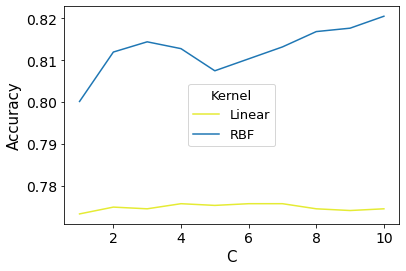

In [25]:
sns.lineplot(x=np.arange(1,11,1),y=score_list,label='Linear',color='#e5eb34')
sns.lineplot(x=np.arange(1,11,1),y=score_list_rbf,label='RBF')
plt.legend(loc='center',fontsize=13,title='Kernel',title_fontsize=13)
plt.xlabel('C',size=15)
plt.ylabel('Accuracy',size=15)
plt.savefig('SVM_CV_10.pdf',bbox_inches='tight')

In [50]:
svm_class=SVC(kernel='rbf',C=100)
svm_class.fit(X_traning,Y_traning)
y_predict=svm_class.predict(X_test)

CM=confusion_matrix(Y_test,y_predict)

In [58]:
from matplotlib.colors import ListedColormap

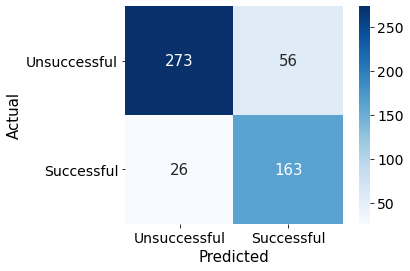

In [61]:
sns.heatmap(CM,annot=True,
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['Unsuccessful','Successful'],
            annot_kws={"fontsize":15},fmt='g',cmap='Blues')

plt.yticks(rotation=0)
plt.xlabel('Predicted',size=15)
plt.ylabel('Actual',size=15)

plt.savefig('SVM_confusion_matrix.pdf',bbox_inches='tight')

In [64]:
lr=LogisticRegression(penalty='none')
lr.fit(X_traning,Y_traning)
y_predict_lr=lr.predict(X_test)

lda=LDA().fit(X=X_traning,y=Y_traning)
qda=QDA().fit(X=X_traning,y=Y_traning)

y_predict_lda=lda.predict(X_test)
y_predict_qda=qda.predict(X_test)

k_model=KNeighborsClassifier(n_neighbors=9,metric='manhattan')
k_model.fit(X_traning,Y_traning)
y_predict_knn=k_model.predict(X_test)

svm_class=SVC(kernel='rbf',C=100)
svm_class.fit(X_traning,Y_traning)
y_predict_svm=svm_class.predict(X_test)

LR
Precision:  0.7205240174672489
Recall:  0.873015873015873
Accuracy:  0.8301158301158301


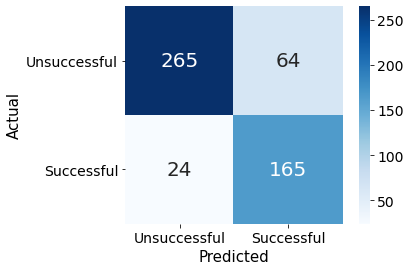

LDA
Precision:  0.7142857142857143
Recall:  0.9259259259259259
Accuracy:  0.8378378378378378


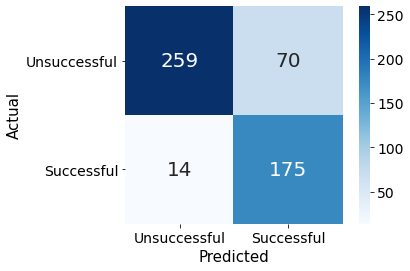

QDA
Precision:  0.8017241379310345
Recall:  0.49206349206349204
Accuracy:  0.7702702702702703


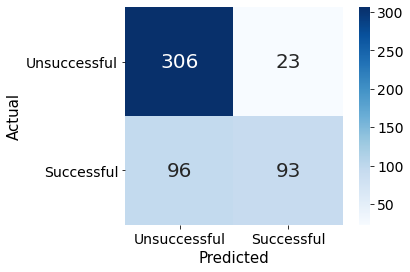

KNN
Precision:  0.7204301075268817
Recall:  0.708994708994709
Accuracy:  0.7934362934362934


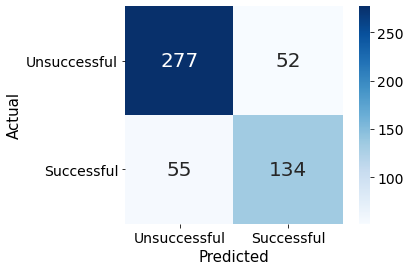

SVM
Precision:  0.7442922374429224
Recall:  0.8624338624338624
Accuracy:  0.8416988416988417


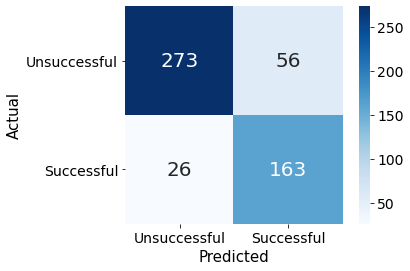

In [70]:
y_values = [y_predict_lr,y_predict_lda,y_predict_qda,y_predict_knn,y_predict_svm]
y_label = ['LR','LDA','QDA','KNN','SVM']

for i in range(len(y_values)):
    print(y_label[i])
    print(f'Precision: ',precision_score(Y_test,y_values[i]))
    print(f'Recall: ',recall_score(Y_test,y_values[i]))
    print('Accuracy: ',accuracy_score(Y_test,y_values[i]))
    CM = CM=confusion_matrix(Y_test,y_values[i])
    sns.heatmap(CM,annot=True,
            square=True,xticklabels=['Unsuccessful','Successful'],
            yticklabels=['Unsuccessful','Successful'],
            annot_kws={"fontsize":20},fmt='g',cmap='Blues')

    plt.yticks(rotation=0)
    plt.xlabel('Predicted',size=15)
    plt.ylabel('Actual',size=15)
    
    plt.savefig(f'{y_label[i]}_confusion_matrix.pdf',bbox_inches='tight')
    plt.show()